Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

Below, please fill in your name and collaborators:

In [1]:
NAME = ""
COLLABORATORS = ""

# Assignment 3 - Time Series Analysis
**(15 points total)**

## Assignment tasks:

In this assignment you will conduct time series analysis of the financial data. 

1. Setup your environment to access and download latest stock data. Please see instructions below for different tools you can use to get the data. You can use any of the options provided, either Quandl or Yahoo Finance. If you know of any other service to download the data, please use that service, provide an explanation in the comments.

2. *(2 points)* Download the **adjusted** close prices for FB, MMM, IBM and AMZN for the last 60 months. If you run into any issues downloading the data from online sources, you can use `.csv` files provided. This will not affect your grade for the assignment.

3. *(3 points)* Resample the data to get prices for the end of the **business** month. Select the **Adjusted Close** for each stock.

4. *(3 points)* Use the pandas `autocorrelation_plot()` function to plot the autocorrelation of the adjusted month-end close prices for each of the stocks.
    - Are they autocorrelated?
    - Provide short explanation.

5. *(4 points)* 
    - Calculate the monthly returns for each stock using the "shift trick" explained in the lecture, using `shift()` function. 
    - Use pandas `autotocorrelation_plot()` to plot the autocorrelation of the monthly returns.
    - Are the returns autocorrelated? Provide short explanation.

6. *(3 points)*
    - Combine all 4 time series (returns) into a single DataFrame,
    - Visualize the correlation between the returns of all pairs of stocks using a scatter plot matrix (use `scatter_matrix()` function from `pandas.plotting`).
    - Explain the results. Is there any correlation?

**NOTES:** 
1. In this assignment, please make sure the DataFrame(s) do not contain any NAs before you plot autocorrelations or scatter matrix.
2. Both options explained below use `pandas-datareader` package for remote data access. To install it, type the following in a command window: `conda install pandas-datareader`. You will also need to install one or more of the following packages `fix_yahoo_finance`, `quandl`. See below.

---------

## Downloading Stock Prices

### Option 1 - Using QUANDL

To use QUANDL service, you need to create an account and get an API Key. Here is the short description of steps:

- Go to https://www.quandl.com/
- Click either `sign up` at the top right corner of the home page, or scroll all the way down and click `Create Free Account` button at the bottom of the page.
- Create an account. 
- You will receive an email to the email address you have used during the registration. Confirm your email.

You are all set.

Now, as you login into your account, click the avatar icon at the top right corner of the page, select `"Account Settings."`
On the next page, you will see `Your API Key` field with a long string of numbers and characters underneath. You need this API key for your call to Quandl from the notebook. In the code below, replace `YOUR_API_KEY` with the actual API key from your account. 

**NOTE**: You can remove this key before submitting the assignment.

In [2]:
# all imports and env variables
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import datetime
import pandas_datareader.data as web

# This line of code should work on Windows and Mac
#%env QUANDL_API_KEY = "YOUR_API_KEY"

# If the above line of code does not work on your system,
# You can use this way of setting Quandl env variable
import quandl
quandl.ApiConfig.api_key = " "

In [25]:
from datetime import date
from dateutil.relativedelta import relativedelta
from typing import List

months_ago: int = 60

start = date.today() + relativedelta(months=-months_ago)
end = date.today()

all_stocks_list = ['FB', 'MMM', 'IBM', 'AMZN']
df_list: List = []

# print(f"Start date is {start}")
# print(f"End date is {end}")

for name in all_stocks_list:
    df = web.DataReader(name, 'quandl', start, end, api_key = 'B1_Sw5EeEUV_Dw_rxh4U')
    df.name = name
    df_list.append(df)

In [26]:
test= df_list[0]

In [27]:
test = test.reset_index()

In [28]:
test

,Date,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
0,2018-03-27,156.31,162.85,150.75,152.19,76787884.0,0.0,1.0,156.31,162.85,150.75,152.19,76787884.0
1,2018-03-26,160.82,161.10,149.02,160.06,125438294.0,0.0,1.0,160.82,161.10,149.02,160.06,125438294.0
2,2018-03-23,165.44,167.10,159.02,159.39,52306891.0,0.0,1.0,165.44,167.10,159.02,159.39,52306891.0
3,2018-03-22,166.13,170.27,163.72,164.89,73389988.0,0.0,1.0,166.13,170.27,163.72,164.89,73389988.0
4,2018-03-21,164.80,173.40,163.30,169.39,105350867.0,0.0,1.0,164.80,173.40,163.30,169.39,105350867.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,2017-07-21,164.16,165.05,163.75,164.43,14494667.0,0.0,1.0,164.16,165.05,163.75,164.43,14494667.0
171,2017-07-20,164.80,165.00,162.81,164.53,18293111.0,0.0,1.0,164.80,165.00,162.81,164.53,18293111.0
172,2017-07-19,163.59,165.70,163.17,164.14,25915988.0,0.0,1.0,163.59,165.70,163.17,164.14,25915988.0
173,2017-07-18,159.66,163.73,159.42,162.86,23621711.0,0.0,1.0,159.66,163.73,159.42,162.86,23621711.0


In [7]:
quandral_format = df_list[0]
quandral_format.head(3)

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2018-03-27,156.31,162.85,150.75,152.19,76787884.0,0.0,1.0,156.31,162.85,150.75,152.19,76787884.0
2018-03-26,160.82,161.10,149.02,160.06,125438294.0,0.0,1.0,160.82,161.10,149.02,160.06,125438294.0
2018-03-23,165.44,167.10,159.02,159.39,52306891.0,0.0,1.0,165.44,167.10,159.02,159.39,52306891.0


### Option 2 - Using Yahoo Finance `yfinance` library

In [180]:
import yfinance as yf
from pandas_datareader import data as pdr
from datetime import date
from dateutil.relativedelta import relativedelta
from typing import List

months_ago: int = 60

start = date.today() + relativedelta(months=-months_ago)

# 1) Using pandas datareader and Yahoo Finance
yf.pdr_override()

stocks_list = ['FB', 'MMM', 'IBM', 'AMZN']
df_list: List = []

for name in all_stocks_list:
    df = pdr.get_data_yahoo(name, start = start)
    df.name = name
    df_list.append(df)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [16]:
finance_format = df_list[0]
finance_format.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-07-17,160.250000,160.779999,158.809998,159.729996,159.729996,12858836
2017-07-18,159.660004,163.729996,159.419998,162.860001,162.860001,23722910
2017-07-19,163.589996,165.699997,163.169998,164.139999,164.139999,26273642


### Reading the csv for AMAZON, FB, IBM, MMM
##### Only run this if Option 1 and Option 2 isn't working 

In [59]:
from typing import List
import pandas as pd

filenames: List = ['amzn_2012-7-31_2017-6-30', 'fb_2012-7-31_2017-6-30', 'ibm_2012-7-31_2017-6-30', 'mmm_2012-7-31_2017-6-30']
df_list: List = []

for _ in filenames:
    df = pd.read_csv(f"{_}.csv")
    df.name = _
    df_list.append(df)

In [58]:
df_list[0]['Date']

0       2017-06-30
1       2017-06-29
2       2017-06-28
3       2017-06-27
4       2017-06-26
           ...    
1233    2012-08-06
1234    2012-08-03
1235    2012-08-02
1236    2012-08-01
1237    2012-07-31
Name: Date, Length: 1238, dtype: object

### Resampling data for AMAZON, FB, IBM, MMM and selecting Adjusted Close for each

In [181]:
adjusted_close_list: List = []
import time

for df in df_list:
    name = df.name
    if 'Date' not in df.columns:
        df['Date'] = df.index
    df = df.reset_index(drop=True)
    resetted_index = df
    df['Date'] = pd.to_datetime(df['Date'])  # converting string date to datetime date for Date column
    in_datetime_df = df
    df = df.loc[df.groupby(pd.Grouper(key='Date', freq='1M')).Date.idxmax()] # resampling data to only get the index with the last day of the month
    df = df.set_index(['Date']) # setting df index to Date column
    resampled_df = df
    time_1 = time.time()
    # df['AdjClose'] = df['Adj Close'] if 'Adj Close' in df.columns else df['AdjClose']
    try:
        adjusted_close_series = df['AdjClose'] # getting the series with AdjClose column

    except KeyError:
        adjusted_close_series = df['Adj Close'] # getting the series with AdjClose column #for yf

    time_2 = time.time()

    adjusted_close_series.name = name


    adjusted_close_list.append(adjusted_close_series) #appending to list

    

In [139]:
adjusted_close_list[-1]

Date
2017-07-31     49.389000
2017-08-31     49.029999
2017-09-29     48.067501
2017-10-31     55.264000
2017-11-30     58.837502
                 ...    
2022-03-31    162.997498
2022-04-29    124.281502
2022-05-31    120.209503
2022-06-30    106.209999
2022-07-15    113.550003
Name: Adj Close, Length: 61, dtype: float64

In [131]:
print(time_2 - time_1)

0.0002880096435546875


In [133]:
print(time_2 - time_1)


0.00010704994201660156


In [76]:
valid = in_datetime_df.groupby(pd.Grouper(key='Date', freq='1M')).Date.idxmax()

In [82]:
in_datetime_df.shape

(1259, 7)

In [85]:
valid

Date
2017-07-31      10
2017-08-31      33
2017-09-30      53
2017-10-31      75
2017-11-30      96
              ... 
2022-03-31    1186
2022-04-30    1206
2022-05-31    1227
2022-06-30    1248
2022-07-31    1258
Freq: M, Name: Date, Length: 61, dtype: int64

In [87]:
res = in_datetime_df.loc[valid]

In [96]:
sample = res.set_index(['Date', 'Open'])

first_index = sample.index[0]
second_index = sample.index[1]

In [91]:
sample

,,High,Low,Close,Adj Close,Volume
Date,Open,,,,,
2017-07-31,50.952499,50.952499,49.351002,49.389000,49.389000,147042000
2017-08-31,48.735001,49.049999,48.638000,49.029999,49.029999,66630000
2017-09-29,48.005501,48.241501,47.918999,48.067501,48.067501,50876000
2017-10-31,55.450001,55.527000,55.056000,55.264000,55.264000,69540000
2017-11-30,58.355000,58.928501,58.000000,58.837502,58.837502,90184000
...,...,...,...,...,...,...
2022-03-31,166.445007,166.494995,162.953506,162.997498,162.997498,59966000
2022-04-29,129.848999,130.761002,121.625000,124.281502,124.281502,272662000
2022-05-31,116.279999,121.994499,115.675003,120.209503,120.209503,144634000


In [104]:
# tuple_ = ('hey', 'b')
list_ = ['hey', 'b']

type(tuple_)

tuple

In [105]:
list_[0] = 1

In [108]:
listed = list(tuple_)

In [110]:
listed[0] = 1

In [111]:
new_tuple = tuple(listed)

In [112]:
new_tuple

(1, 'b')

In [100]:
sample.loc[[first_index, second_index], 'High']

Date        Open     
2017-07-31  50.952499    50.952499
2017-08-31  48.735001    49.049999
Name: High, dtype: float64

In [39]:
dates = {'date': ['2022-07-17', '2017-07-19']}

In [43]:
df_ = pd.DataFrame(dates)

In [45]:
df_

,date
0,2022-07-17
1,2017-07-19


In [46]:
df_['date']

0    2022-07-17
1    2017-07-19
Name: date, dtype: object

In [47]:
resetted_index['Date']

0      2017-07-17
1      2017-07-18
2      2017-07-19
3      2017-07-20
4      2017-07-21
          ...    
1254   2022-07-11
1255   2022-07-12
1256   2022-07-13
1257   2022-07-14
1258   2022-07-15
Name: Date, Length: 1259, dtype: datetime64[ns]

In [54]:
data = resetted_index.Date.apply(lambda x: x.quarter)


In [55]:
data

0       3
1       3
2       3
3       3
4       3
       ..
1254    3
1255    3
1256    3
1257    3
1258    3
Name: Date, Length: 1259, dtype: int64

In [25]:
adjusted_close_list[0]

Date
2012-07-31    233.3000
2012-08-31    248.2700
2012-09-28    254.3200
2012-10-31    232.8931
2012-11-30    252.0500
2012-12-31    250.8700
2013-01-31    265.5000
2013-02-28    264.2700
2013-03-28    266.4900
2013-04-30    253.8100
2013-05-31    269.2000
2013-06-28    277.6900
2013-07-31    301.2200
2013-08-30    280.9800
2013-09-30    312.6400
2013-10-31    364.0300
2013-11-29    393.6200
2013-12-31    398.7900
2014-01-31    358.6900
2014-02-28    362.1000
2014-03-31    336.3650
2014-04-30    304.1300
2014-05-30    312.5500
2014-06-30    324.7800
2014-07-31    312.9900
2014-08-29    339.0400
2014-09-30    322.4400
2014-10-31    305.4600
2014-11-28    338.6400
2014-12-31    310.3500
2015-01-30    354.5300
2015-02-27    380.1600
2015-03-31    372.1000
2015-04-30    421.7800
2015-05-29    429.2300
2015-06-30    434.0900
2015-07-31    536.1500
2015-08-31    512.8900
2015-09-30    511.6700
2015-10-30    625.9000
2015-11-30    664.8000
2015-12-31    675.8900
2016-01-29    587.0000
2016-0

In [37]:
res = test.groupby(pd.Grouper(key='Date', freq='1M')).Date

# test

### Showing autocorrelation function for each stock closing price

In [159]:
old_stock_list = stocks_list

In [150]:
stocks_list.append(1)

In [162]:
stocks_list = ['FB', 'MMM', 'IBM', 'AMZN']

In [170]:
director = dir(pd.plotting)

In [169]:
if 'autocorrelation_plot' in director:
    print("i am here")

i am here


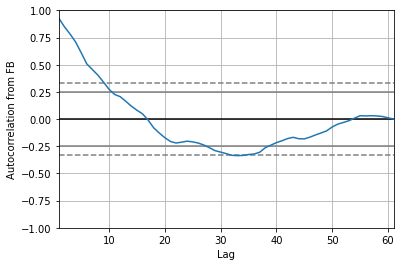

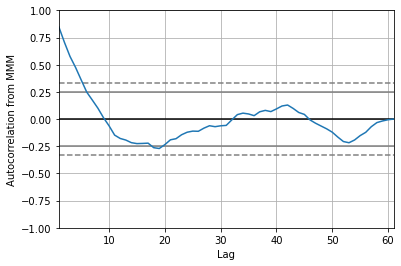

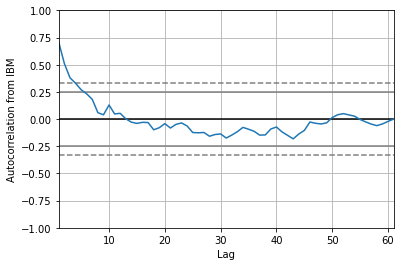

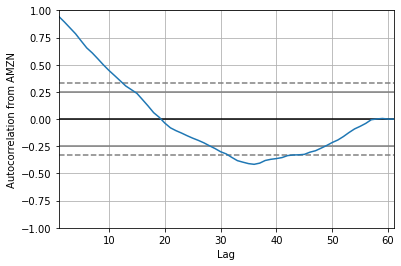

In [202]:
import matplotlib.pyplot as plt

for closing, name in zip(adjusted_close_list, filenames):
    x = pd.plotting.autocorrelation_plot(closing)
    plt.ylabel(f'Autocorrelation from {closing.name}')
    plt.show()
    x.plot()

In [219]:
df_1 = df_list[0].drop(['Date'], axis = 1)
df_2 = df_list[1].drop(['Date'], axis = 1)

In [223]:
time1 = time.time()
(df_1 + df_2) / 2
time2 = time.time()

print(time2-time1)


0.00043487548828125


### Shift trick to manually solve the returns and then showing the correlation function for each

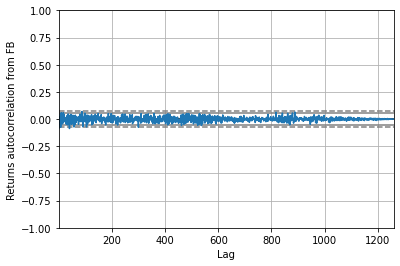

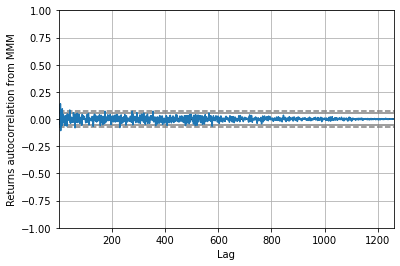

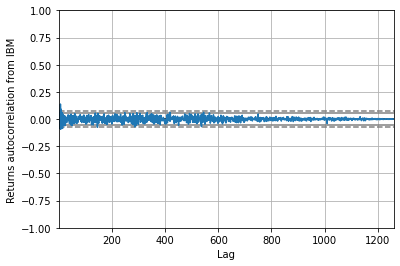

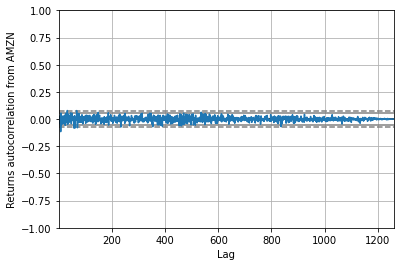

In [203]:
stock_returns_list: List = []

for df, name in zip(df_list, stocks_list):
    try:
        closing = df['AdjClose']
    except KeyError:
        closing = df['Adj Close']
    shifted_closing_price = closing.shift(1)
    try:
        dividend = df['ExDividend']
    except KeyError:
        dividend = 0
    stock_return = ((closing + dividend)/ shifted_closing_price) - 1
    stock_return = stock_return.fillna(0) # make sure no NaN value
    stock_return.name = name
    stock_returns_list.append(stock_return.fillna(0))

    x = pd.plotting.autocorrelation_plot(stock_return)
    plt.ylabel(f'Returns autocorrelation from {name}')
    plt.show()
    x.plot()


In [233]:
pd.concat(stock_returns_list, axis = 1)

,FB,MMM,IBM,AMZN
Date,,,,
2017-07-17,0.000000,0.000000,0.000000,0.000000
2017-07-18,0.019596,-0.001748,0.006470,0.014267
2017-07-19,0.007860,0.003739,-0.042013,0.002362
2017-07-20,0.002376,0.001650,0.000882,0.001782
2017-07-21,-0.000608,-0.006072,-0.003928,-0.002945
...,...,...,...,...
2022-07-11,-0.046816,0.002253,0.003773,-0.032803
2022-07-12,0.002394,0.009224,-0.012908,-0.022640
2022-07-13,0.001347,-0.014055,-0.014370,0.010804


### Combining returns into 1 dataframe and visualization using scatter plot

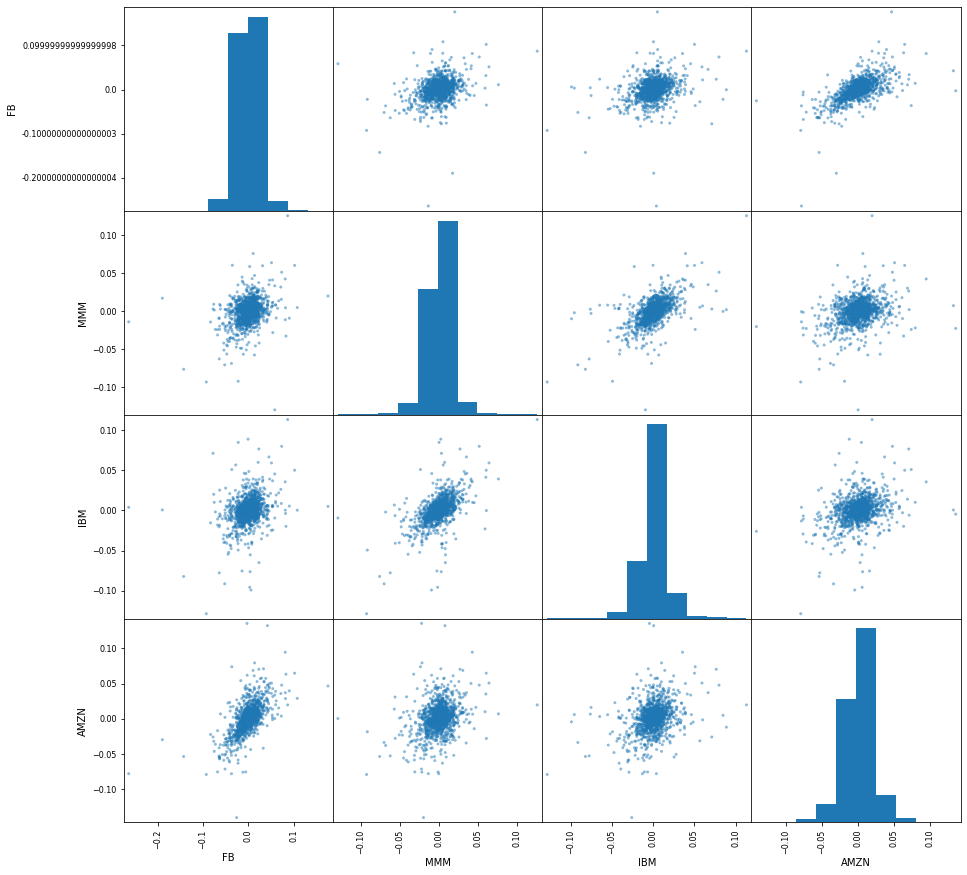

In [240]:
all_returns = pd.concat(stock_returns_list, axis = 1);
scatter_matrix = pd.plotting.scatter_matrix(all_returns, figsize=[15,15]);

# for ax in scatter_matrix.ravel():
#     ax.set_xlabel(ax.get_xlabel(), fontsize = 12, rotation = 90);
#     ax.set_ylabel(ax.get_ylabel(), fontsize = 12, rotation = 0);